<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Uma análise de regressão busca estudar a relação entre uma variável dependente e uma ou mais variáveis independentes, representando-a através de um modelo matemático. Essa regressão linear é chamada de simples quando a variável independente estabelece uma relação linear com a variável dependente. Quando temos diversas variáveis independentes, temos então um modelo de regressão linear múltipla.

Quando vamos vender algo, precisamos definir um preço de venda que não pode ser nem muito barato, que irá acabar com o estoque sem gerar um certo lucro, e também nem muito caro para não interferir na demanda. Agora na hora de tratar de imóveis temos outros fatores que influênciam nessa venda. 

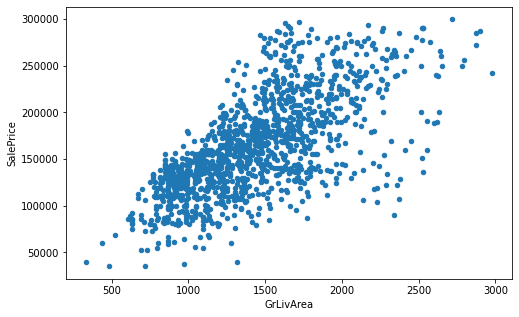

Acima temos um *scatter plot* entre a área do imóvel e seu preço de venda do mesmo para a cidade de Ames, no estado americano de Iowa. Se fosse decidido que iríamos vender uma casa de 1339$m^2$, qual seria o preço ideal para colocarmos à venda?

Como temos dados de milhares de outras casas, podemos encontrar uma relação linear entre estes dados, por que não traçar uma reta para inferir o preço da nossa casa?

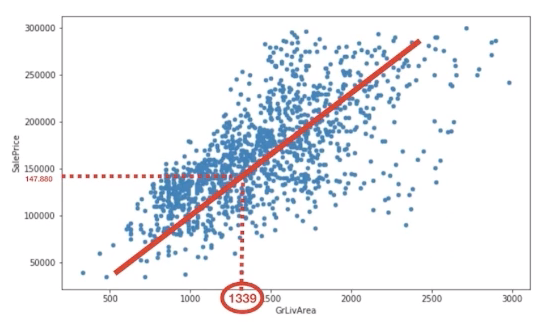

Traçamos esta reta através da equação $\hat{y} = \theta_0 + \theta_1 x_1$, onde $\hat{y}$ é o valor que estamos querendo prever.

Para descobrirmos o quão boa é uma reta, se ela representa os pontos que buscamos de forma adequada, podemos calcular o erro quadrático médio (*Mean Squared Error* - MSE) para todos os pontos em questão. 

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Através desta equação calculamos a distância de cada ponto até a reta. Quanto menor for este valor, melhor é a nossa solução. O algortitmo do `scikit-learn` efetua os cálculos para minimizar esse valor máximo. Quando ele encontra um valor *ideal* ele armazena os valores dos coeficientes e do intercepto como atributo da variável.

## Regressão Linear Simples

Para demonstrar como implementar uma Regressão Linear Simples, nós iremos usar o *dataset* [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) juntamente com a biblioteca `scikit-learn`.


O [*dataset* original](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) que eu estou usando neste *notebook* contém 79 variáveis relativas à imóveis de Ames, uma cidade localizada no estado americano de Iowa, e está disponível para download no Kaggle. No entanto, para facilitar o entendimento dos conceitos básicos, preparei uma versão simplificada desse *dataset*, onde há apenas uma variável. O arquivo `csv` está disponível [neste link](http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0).

Vou começar importando o arquivo para um *DataFrame* e fazendo uma análise bem rápida deste. Lembre-se, o foco deste módulo não é fazer uma análise exploratória extensiva, mas sim focar na etapa de implementação de modelos de *Machine Learning*.


In [1]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt

# importando arquivo 
df = pd.read_csv('http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0')

df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


O *dataset* conta com duas features sendo `GrLivArea - Ground Living Area` que nos mostra o tamanho do imóvel ($m^2$), e a nossa variável alvo `SalePrice` com o preço de venda dos mesmos imóveis. 

De início vamos plotar um gráfico de dispersão (`scatter`) para conferirmos a distribuição dos valores e observamos a relação entre os pontos.


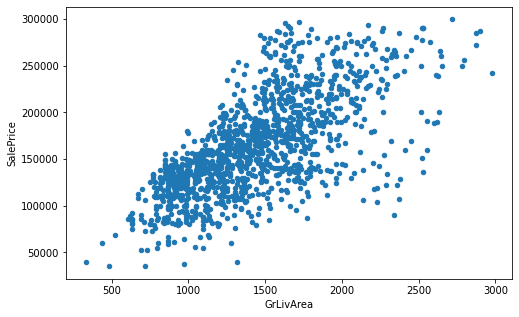

In [2]:
#plotando gráfico de dispersão

#criando figura
fig, ax = plt.subplots(figsize=(8,5))
#definindo plotagem
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

## Regressão Linear Simples

Após a análise exploratória feita, ter definindo as variáveis e adequado os dados, podemos construir a Regressão Linear Simples.

Em locais como Kaggle, os dados a serem utilizados já se encontram separados em treino e teste, porém no mundo real, temos de dividir o conjunto entrei *train & test*. 

Aqui se encontra a parte mais importante, uma vez que vai tornar o modelo mais genérico e com melhor precisão em relacão aos novos dados que vão ser a nossa entrada. Neste dataset vamos separar 20% dos dados para teste final. 

In [4]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Vamos então separar nossa variável dependente `SalePrice` da nossa *feature*, para então utilizar a função `train_test_split` para dividirmos os dados de treino e teste.

In [10]:
# escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# instanciar e escolher os hiperparametros
model = LinearRegression()

# separar os dados de treino e teste entre
# feature matrix & target vector
X = df['GrLivArea']
y = df['SalePrice']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit do modelo (treinar)
model.fit(X_train, y_train)

# Fazer previsões com os novos dados
y_pred = model.predict(X_test)

ValueError: ignored

O que houve aqui?

A mensagem de erro é devida à `sklearn.pipeline` do pacote, ocorre pois passamos uma única variável (feature) na variável `X`, o próprio erro nos informa -> `Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.`

Neste momento o `scikit-learn` espera duas coisas:
* Que a variável `X` seja sempre um `np.array` com **duas dimensões**.
* Que a variável `y` seja sempre um `np.array` com **uma dimensão**.

Vamos conferir as dimensões de cada variável nossa e ver se estão de acordo com as necessidades do pacote.

In [12]:
print('df:\t\t', df.shape)

print('X:\t\t', X.shape)

print('X (reshape):\t', X.values.reshape(-1,1).shape)

print('y:\t\t', y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


Sempre que for necessário alterar a dimensão de um *array* para atender uma condição, utilize `.reshape(-1,1)` ou `.reshape(1,-1)` dependendo da condição.

Portanto agora vamos corrigir o erro e prosseguir com a nossa regressão.

In [14]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. instanciar e escolher os hiperparametros
model = LinearRegression()

# 3. separar os dados de treino e teste entre
#    feature matrix & target vector
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression()

Quando se trata de regressão linear, a idéia é construir uma reta, que possui coeficientes associados com os ângulos de inclinação e intercepto. 

No caso em questão, de uma Regressão Linear Simples, temos apenas um coeficiente de regressão. 

Para obtermos os **coeficientes de regressão e intercepto**, basta acessar os atributos do modelo diretamente da variável `model`.

In [18]:
# conferindo os coeficientes
print('Coeficiente: \t', model.coef_)
print('Intercepto: \t', model.intercept_)

Coeficiente: 	 [85.28805079]
Intercepto: 	 42315.68193243988


Como o nosso problema conta com uma pequena dimensionalidade, é possível plotar nossa reta, obtida pelo modelo de *Machine Learning* sobre os dados do nosso *dataset*.
Veja o desempenho que ela representa no nosso conjunto de pontos.

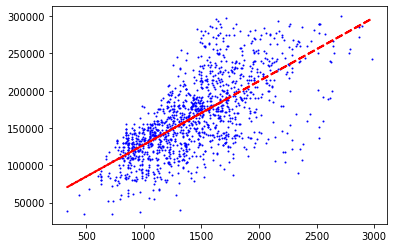

In [21]:
# plotando reta e dados

#criando figura
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=2)

Agora que temos nosso modelo treinado, podemos começar a realizar previsões em cima de novos dados. Como separamos anteriormente os dados de teste na variável `y_test`, vamos fazer as previsões utilizando o método `predict()` e armazenar o resultado na variável `y_pred`. 

In [26]:
# 5. Fazendo previsões em cima de novos dados
y_pred = model.predict(X_test)

Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* ***R-Squared*** - métrica popularmente usada para calcualr a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1, sendo 1 a melhor pontuação.

* ***Mean Absolute Error (MAE)*** - é a medida absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE)*** - é a média dos quadrados dos erros e provavelmente a métrica mais desconhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes. 

In [27]:
# avaliar o desempenho do modelo
print('R2 Score:\t', r2_score(y_test, y_pred))
print('MAE:\t\t', mean_absolute_error(y_test,y_pred))
print('MSE:\t\t', mean_squared_error(y_test,y_pred))

R2 Score:	 0.3576237285310213
MAE:		 31022.96920078146
MSE:		 1722405130.8118029


## Regressão Linear Múltipla

O raciocínio utilizado aqui é o mesmo utilizado anteriormente, porém, a diferença é que temos mais variáveis independentes para considerar nosso modelo.

Para demonstrar a implementação deste modelo, vamos utilizar um *dataset* mais completo do que o utilizado anteriormente, encontra-se [neste link](http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=0).

Todas as 1460 entradas foram mantidas, porém agora contamos com 34 *features*, sendo assim, vamos dar contínuidade com a nossa análise. 

In [58]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# importando dataset

df_full = pd.read_csv('http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=0')

# ver as primeiras entradas
print('Tamanho de df_full: {}\n'.format(df_full.shape))
df_full.head()

Tamanho de df_full: (1460, 35)



,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [59]:
# removendo coluna ID 
df_full.drop('Id', axis=1, inplace=True)

Assim como fizemos anteriomente, vamos dividir os dados entre teste-treino, construir o modelo e executar o método `fit(X_train, y_train)`.

In [60]:
# 1. importando modelo 
from sklearn.linear_model import LinearRegression

# 2. Escolher os Hiperparametros
model = LinearRegression()

# 3. Separar os dados entre feature matrix & target vector
X = df_full.drop('SalePrice', axis=1)
y = df_full['SalePrice'] 

# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treino)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_predicted = model.predict(X_test)

Note que desta vez, diferente da Regressão Linear Simples, não ocorreu qualquer tipo de erro relacionado ao formato do `array`.

Quando tentamos utilizar apenas uma *feature* como no exemplo anterior, a estrutura era de apenas 1 dimensão fazendo com que o `scikit-learn` apresenta-se um erro. 

Agora nosso novo *dataset* conta com diversas *features*, o objeto utilizado conta com 2 dimensões sem a necessidade de ser redimensionado. Confira abaixo os resultados das dimensões de cada variável que estamos utilizando, depois compare com o exemplo anterior.

In [61]:
print('df_full:\t', df_full.shape)

print('X:\t\t', X.shape)

print('y:\t\t', y.shape)

df_full:	 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)


Na Regressão Linear Simples tínhamos apenas um coeficiente e um intercepto, agora contamos com um coeficiente para cada variável. O processo de obtenção do **coeficiente de regressão** e o **intercepto** continua o mesmo, basta acessar o modelo diretamente da sua variável `model`.

In [62]:
# imprimindo os coeficientes
print("Coeficiente:\t", model.coef_)
print("")
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-1.93295119e+02  3.64486660e-01  1.92824051e+04  4.74054906e+03
  3.63975163e+02  9.28849122e+01  1.04338966e+01 -4.57099937e+00
  1.71732739e+00  7.58022466e+00  1.36566412e+01  1.34167475e+01
  6.05885266e+00  3.31322413e+01  1.04008765e+04  6.55255745e+03
  5.05350258e+03 -1.17552336e+03 -1.08691701e+04 -1.36080624e+04
  5.67869698e+03  4.79303720e+03  1.21338040e+04 -2.09148019e-02
  2.38414771e+01 -1.87715060e+01  2.28114790e+01  1.86870286e+01
  6.09097846e+01 -7.26339940e+01 -4.95543175e-01  3.41937044e+00
 -8.31117282e+02]

Intercepto:	 695493.5672215808


Vamos agora conferir o desempenho do nosso modelo em cima do conjunto de testes. Para isso vamos colocar a variável `X_test` como argumento do `ml_model.predict()`, então salvar as previsões e comparar o seu desempenho com as métricas já apresentadas.

In [63]:
# verificando o desempenho do modelo
print("R2 Score:\t", r2_score(y_test,y_predicted))
print("MAE:\t\t", mean_absolute_error(y_test,y_predicted))
print("MSE:\t\t", mean_squared_error(y_test, y_predicted))

R2 Score:	 0.8577332837678927
MAE:		 20442.407618477737
MSE:		 766250719.507528


Os valores obtidos no teste passado foram os seguintes:


* R2 Score:	 0.3576237285310213
* MAE:		 31022.96920078146
* MSE:		 1722405130.8118029

---

Veja como as métricas avaliadas melhoraram significativamente. Como o modelo teve acesso à mais *features* para treino, conseguiu melhorar sua precisão. 